# Gradient Descent with Momentum

The problem with gradient descent is the update of weights and biases are only governed by learning rate and gradient descent of that moment itself without taking into account of the previous steps which can confuse the learning algorithm and gradient descent step will "oscillate" toward convergence.
Gradient Descent with Momentum helps in addressing this issues by adding Exponentially Weighted Averages into the gradient descent step.

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import utils

Number of training examples: 480
Number of testing examples: 120
Shape of train set: torch.Size([480, 2])
Shape of test set: torch.Size([120, 2])


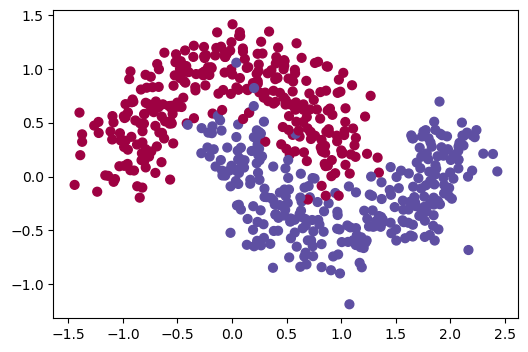

In [2]:
X_train, X_test, y_train, y_test = utils.create_dataset()

In [3]:
model = utils.create_classifier(2,1)

LEARNING_RATE = 0.01
EPOCHS = 2000

loss_fn = nn.BCELoss()
# added momemtum=0.9
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(1, EPOCHS+1):
    #Forward propagation
    train_preds = model(X_train)
    train_loss = loss_fn(train_preds, y_train)
    # Calculating accuracy and saving training history
    train_acc = utils.calculate_accuracy(train_preds, y_train)
    train_losses.append(train_loss.item())
    train_accs.append(train_acc.item())
    #Backpropagation
    optimizer.zero_grad()
    train_loss.backward()
    #Gradient-descent step
    optimizer.step()
    
    #Predicting on test data
    with torch.no_grad():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, y_test)
        ## Calculating accuracy and saving training history
        test_acc = utils.calculate_accuracy(test_preds, y_test)
        test_losses.append(test_loss.item())
        test_accs.append(test_acc.item())
        
    # Print training data
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
            f' Train loss: {np.round(train_loss.item(),3)} \t|' \
            f' Test loss: {np.round(test_loss.item(),3)} \t|' \
            f' Train acc: {np.round(train_acc.item(),2)} \t|' \
            f' Test acc: {np.round(test_acc.item(),2)}')
        
# Print final training and testing accuracy
print(f'Final Train Accuracy: {np.round(train_accs[-1],2)}')
print(f'Final Test Accuracy: {np.round(test_accs[-1],2)}')

Epoch: 100 	| Train loss: 0.557 	| Test loss: 0.553 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 200 	| Train loss: 0.272 	| Test loss: 0.28 	| Train acc: 0.88 	| Test acc: 0.88
Epoch: 300 	| Train loss: 0.243 	| Test loss: 0.246 	| Train acc: 0.89 	| Test acc: 0.89
Epoch: 400 	| Train loss: 0.203 	| Test loss: 0.199 	| Train acc: 0.92 	| Test acc: 0.9
Epoch: 500 	| Train loss: 0.15 	| Test loss: 0.138 	| Train acc: 0.94 	| Test acc: 0.96
Epoch: 600 	| Train loss: 0.114 	| Test loss: 0.094 	| Train acc: 0.96 	| Test acc: 0.98
Epoch: 700 	| Train loss: 0.098 	| Test loss: 0.073 	| Train acc: 0.96 	| Test acc: 0.98
Epoch: 800 	| Train loss: 0.091 	| Test loss: 0.063 	| Train acc: 0.97 	| Test acc: 0.98
Epoch: 900 	| Train loss: 0.087 	| Test loss: 0.059 	| Train acc: 0.97 	| Test acc: 0.98
Epoch: 1000 	| Train loss: 0.085 	| Test loss: 0.056 	| Train acc: 0.97 	| Test acc: 0.98
Epoch: 1100 	| Train loss: 0.084 	| Test loss: 0.055 	| Train acc: 0.97 	| Test acc: 0.98
Epoch: 1200 	| Train l

Without changing anycode compared with the notebook without any optimization methods we were able to attain 97% train accuracy using gradient descent with momemtum.

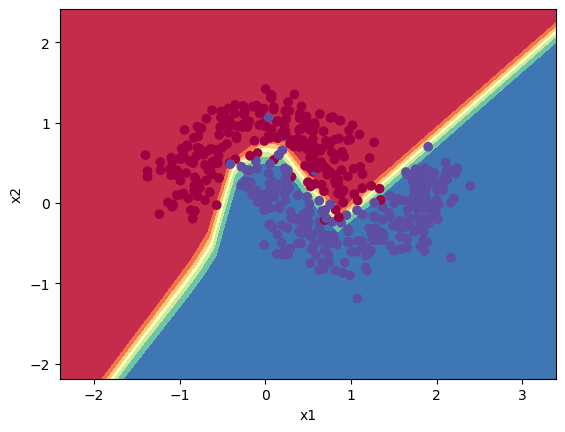

In [4]:
utils.plot_decision_boundary(model, X_train, y_train)

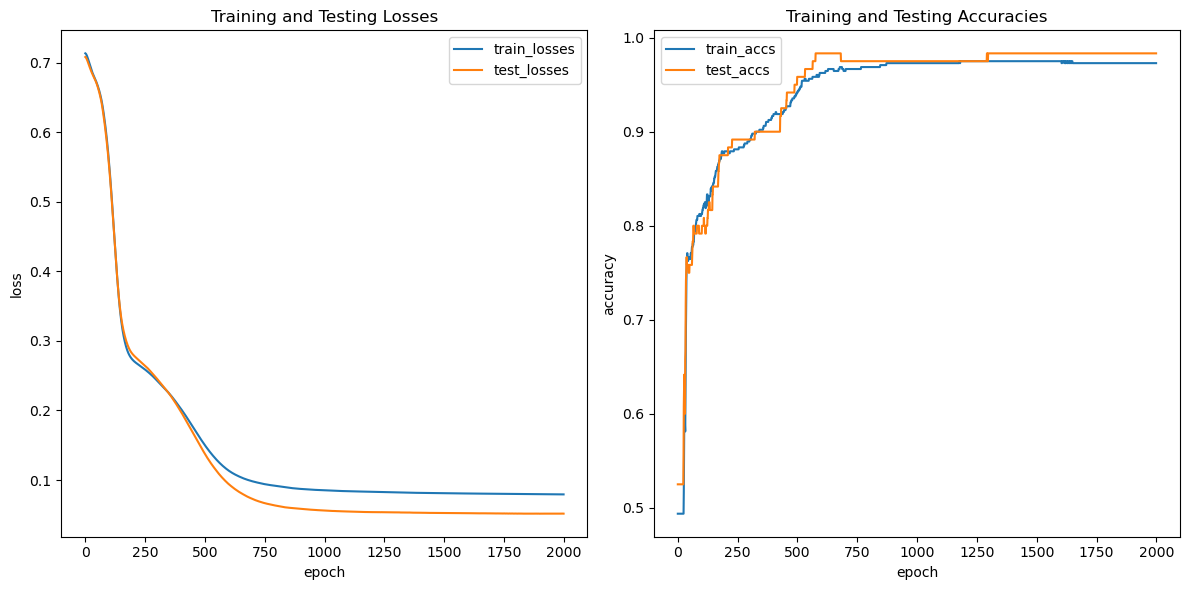

In [5]:
utils.plot_metrics(train_losses, test_losses, train_accs, test_accs)